# Features 2
Acá probamos diferentes modelos para las features 2.
|hora|dia_semana|mes|es_feriado|total_bicis_salieron_global|pct_mujeres_salieron_global|pct_hombres_salieron_global|q1_edad_salieron_global|media_edad_salieron_global|q3_edad_salieron_global|pct_iconic_salieron_global|pct_fit_salieron_global|bicis_salieron_estacion_2| ... | bicis_salieron_estacion_x|llegadas_estacion_2_h1| ...|llegadas_estacion_x_h24|target_estacion_2| ... |target_estacion_x|

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import importlib

In [38]:
import models_f2 as md2
import data_processing as dp
import metrics as mt

In [33]:
BASE_DIR = os.getcwd()
train_f2_path = os.path.join(BASE_DIR, '..', '..', 'data', 'processed', 'features2', 'train_dataset_features2.csv')
val_f2_path = os.path.join(BASE_DIR, '..', '..', 'data', 'processed', 'features2', 'val_dataset_features2.csv')
test_f2_path = os.path.join(BASE_DIR, '..', '..','data', 'processed', 'features2', 'test_dataset_features2.csv')

In [34]:
train_f2 = pd.read_csv(train_f2_path)
val_f2 = pd.read_csv(val_f2_path)
test_f2 = pd.read_csv(test_f2_path)

# Modelos básicos
Corremos modelos básicos con hiperparámetros arbitrarios para ver como es la situación actual. Mostramos para cada modelo las métricas.

### 1. Predicción 202 solo con 202
Creamos un dataset que solo usa la estación de la facultad de derecho porque es la que más viajes tiene.

In [35]:
# 202
importlib.reload(dp)
df_filtrado_train_202 = dp.filtrar_dataset_por_estaciones(train_f2, [202], verbose=False)
X_train_202, y_train_202, feature_names_train_202 = dp.dividir_dataset_estacion(df_filtrado_train_202, 202)

df_filtrado_val_202 = dp.filtrar_dataset_por_estaciones(val_f2, [202], verbose=False)
X_val_202, y_val_202, feature_names_val_202 = dp.dividir_dataset_estacion(df_filtrado_val_202, 202, verbose=False)

df_filtrado_test_202 = dp.filtrar_dataset_por_estaciones(test_f2, [202], verbose=False)
X_test_202, y_test_202, feature_names_test_202 = dp.dividir_dataset_estacion(df_filtrado_test_202, 202, verbose=False)



Dataset filtrado: (12108, 5082) → (12108, 401) (estaciones: [202])
✓ Columna 'hora' convertida a hora (0-23)
=== DIVISIÓN DATASET ESTACIÓN 202 ===
Shape original: (12108, 401)
Features (X): (12108, 39)
Target (y): (12108,)
Target columna: target_estacion_202
Rango de y: 0.00 - 38.00
Media de y: 2.81
Features incluidos: 39

📊 ESTADÍSTICAS DEL TARGET:
  - Valores nulos: 0
  - Valores cero: 4521
  - Percentiles: 25%=0.00, 50%=1.00, 75%=4.00
Dataset filtrado: (1950, 4970) → (1950, 393) (estaciones: [202])
Dataset dividido estación 202: X(1950, 39), y(1950,)
Dataset filtrado: (2037, 5096) → (2037, 402) (estaciones: [202])
Dataset dividido estación 202: X(2037, 39), y(2037,)


In [36]:
importlib.reload(md2)
pred_202 = md2.linear_regression(X_train_202, y_train_202, X_val_202)


MÉTRICAS DE REGRESIÓN - Linear Regression
                           Métrica      Linear Regression
               Mean Absolute Error                 1.2021
                Mean Squared Error                 3.5738
           Root Mean Squared Error                 1.8905
                         R-squared                 0.6643
Mean Absolute Percentage Error (%) 155611118851783136.00%
                Explained Variance                 0.6700
                     Maximum Error                12.7255
                       Correlation                 0.8195
                              Bias                 0.2466
                Relative Error (%)         3455260969.35%
 --- Estadísticas Descriptivas ---                       
              Media Valores Reales                 1.9882
                Media Predicciones                 2.2348
         Desv. Est. Valores Reales                 3.2627
           Desv. Est. Predicciones                 2.8015
                Número de Mue

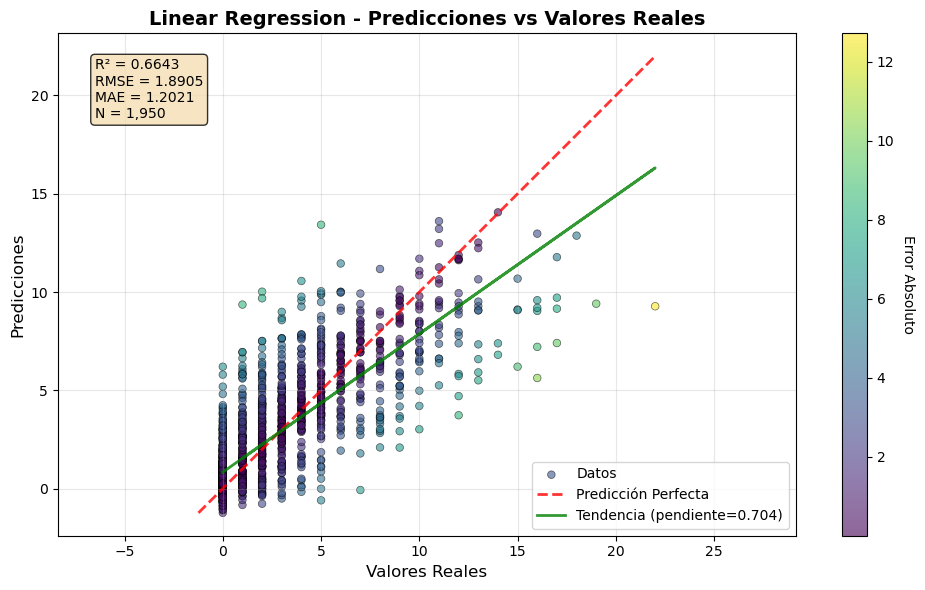

In [44]:
importlib.reload(mt)
metricas, tabla = mt.evaluar_modelo_regresion(y_val_202, pred_202, "Linear Regression")

In [53]:
importlib.reload(md2)
print("Training Random Forest Regressor...")
pred_202_rf = md2.random_forest_regressor(X_train_202, y_train_202, X_val_202)
print("Training Gradient Boosting Regressor...")
pred_202_gb = md2.gradient_boosting_regressor(X_train_202, y_train_202, X_val_202)
print("Training Decision Tree Regressor...")
pred_202_dt = md2.decision_tree_regressor(X_train_202, y_train_202, X_val_202)
print("Training KNN Regressor...")
pred_202_knn = md2.knn_regressor(X_train_202, y_train_202, X_val_202)
# print("Training SVR Regressor...")
# pred_202_svr = md2.svr_regressor(X_train_202, y_train_202, X_val_202)
print("Training Ridge Regression...")
pred_202_lr_ridge = md2.ridge_regression(X_train_202, y_train_202, X_val_202)
print("Training Lasso Regression...")
pred_202_lr_lasso = md2.lasso_regression(X_train_202, y_train_202, X_val_202)


Training Random Forest Regressor...
Training Gradient Boosting Regressor...
Training Decision Tree Regressor...
Training KNN Regressor...
Training Ridge Regression...
Training Lasso Regression...


In [56]:
# comparación de modelos
importlib.reload(mt)
modelos_predicciones = {'Linear Regression' : pred_202,
        'Random Forest Regressor' : pred_202_rf,
        'Gradient Boosting Regressor' : pred_202_gb,
        'Decision Tree Regressor' : pred_202_dt,
        'KNN Regressor' : pred_202_knn,
        # 'SVR Regressor' : pred_202_svr,
        'Ridge Regression' : pred_202_lr_ridge,
        'Lasso Regression' : pred_202_lr_lasso}

mt.tabla_metricas_modelos(modelos_predicciones, y_val_202)


🏆 MEJOR MODELO: Random Forest Regressor
   R² = 0.6987 | RMSE = 1.7910 | MAE = 1.0041


,Rank,Modelo,MAE,RMSE,R²,MAPE (%),Correlación,N_Muestras
0,1,Random Forest Regressor,1.0041,1.7910,0.6987,7.945505e+16,0.8437,1950
1,2,Gradient Boosting Regressor,1.0233,1.8256,0.6869,8.706279e+16,0.8339,1950
2,3,Linear Regression,1.1942,1.8732,0.6704,1.578436e+17,0.8243,1950
3,4,Ridge Regression,1.2035,1.8909,0.6641,1.561083e+17,0.8195,1950
4,5,Lasso Regression,1.3314,1.9594,0.6394,1.993967e+17,0.8074,1950
5,6,KNN Regressor,1.0775,2.0296,0.6131,6.420516e+16,0.8104,1950
6,7,Decision Tree Regressor,1.3179,2.5488,0.3898,6.212658e+16,0.7287,1950


### 2. Predicción 202 con 202, 
Predecimos: 202 (Facultad de Derecho)
Estaciones en features:
- 202 (Facultad de Derecho)
- 5 (Plaza Italia)
- 175 (Constitución)
- 14 (Pacifico)
- 130 (Retiro II)


In [47]:
# 202 con más estaciones populares
importlib.reload(dp)
df_filtrado_train_202_populares = dp.filtrar_dataset_por_estaciones(train_f2, [202, 5, 175, 14, 130], verbose=False)
X_train_202_populares, y_train_202_populares, feature_names_train_202_populares = dp.dividir_dataset_estacion(df_filtrado_train_202_populares, 202)

df_filtrado_val_202_populares = dp.filtrar_dataset_por_estaciones(val_f2, [202, 5, 175, 14, 130], verbose=False)
X_val_202_populares, y_val_202_populares, feature_names_val_202_populares = dp.dividir_dataset_estacion(df_filtrado_val_202_populares, 202, verbose=False)


Dataset filtrado: (12108, 5082) → (12108, 453) (estaciones: [202, 5, 175, 14, 130])
✓ Columna 'hora' convertida a hora (0-23)
=== DIVISIÓN DATASET ESTACIÓN 202 ===
Shape original: (12108, 453)
Features (X): (12108, 91)
Target (y): (12108,)
Target columna: target_estacion_202
Rango de y: 0.00 - 38.00
Media de y: 2.81
Features incluidos: 91

📊 ESTADÍSTICAS DEL TARGET:
  - Valores nulos: 0
  - Valores cero: 4521
  - Percentiles: 25%=0.00, 50%=1.00, 75%=4.00
Dataset filtrado: (1950, 4970) → (1950, 445) (estaciones: [202, 5, 175, 14, 130])
Dataset dividido estación 202: X(1950, 91), y(1950,)


In [50]:
importlib.reload(md2)
pred_202_populares = md2.linear_regression(X_train_202_populares, y_train_202_populares, X_val_202_populares)


MÉTRICAS DE REGRESIÓN - Linear Regression
                           Métrica      Linear Regression
               Mean Absolute Error                 1.1942
                Mean Squared Error                 3.5088
           Root Mean Squared Error                 1.8732
                         R-squared                 0.6704
Mean Absolute Percentage Error (%) 157843586342994784.00%
                Explained Variance                 0.6767
                     Maximum Error                12.0851
                       Correlation                 0.8243
                              Bias                 0.2589
                Relative Error (%)         3504831704.54%
 --- Estadísticas Descriptivas ---                       
              Media Valores Reales                 1.9882
                Media Predicciones                 2.2471
         Desv. Est. Valores Reales                 3.2627
           Desv. Est. Predicciones                 2.8619
                Número de Mue

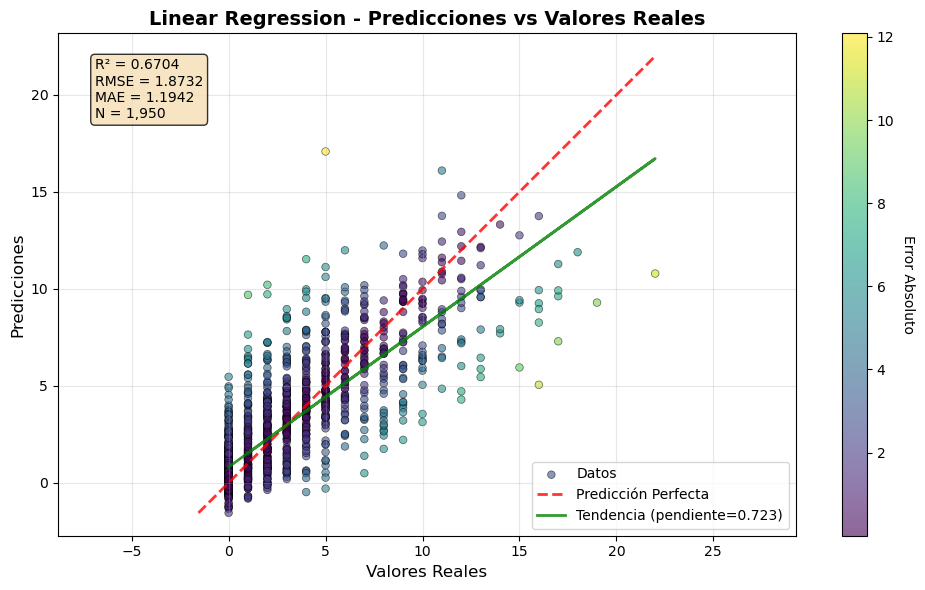

In [51]:
importlib.reload(mt)
metricas, tabla = mt.evaluar_modelo_regresion(y_val_202, pred_202_populares, "Linear Regression")

# Visualización de las features 2
Hacemos PCA y visualizamos, imprimimos estadísticas descriptivas y graficamos las distribuciones de las features. Cualquier cosa que ayude.

# Feature engineering
Acomodamos features, relacionamos, sacamos, reducimos la dimensionalidad, etc. para mejorar el modelo en base a lo que vimos en la visualización.

# Cross validation
Elegimos los óptimos hiperparámetros.

# Entrenamientos finales
Entrenamos los modelos finales con los hiperparámetros óptimos y guardamos los resultados.